In [5]:
!pip install pandas
!pip install transformers
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.3 MB/s 
     |████████████████████████████████| 7.6 MB 21.5 MB/s 
     |████████████████████████████████| 182 kB 71.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [7]:
import os
os.chdir('/content/drive/MyDrive/nlp/Inference')
os.getcwd()

'/content/drive/MyDrive/nlp/Inference'

## Importing Model

In [8]:
import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import CuDNNLSTM
from keras.layers import Dropout
from keras.layers import Embedding
import warnings
from keras import backend as K

In [9]:
embedding_vecor_length = 100
total_words = 201523 #lstmfeat.total_words
model = Sequential()
model.add(Embedding(total_words ,embedding_vecor_length, input_length=350))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mse'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 350, 100)          20152300  
                                                                 
 lstm (LSTM)                 (None, 350, 128)          117248    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 20,401,261
Trainable params: 20,401,261
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
import joblib
import numpy as np
 
# Load the model from the file
modeln = joblib.load('best_model.pkl')
modeln

DecisionTreeRegressor(max_depth=7, min_samples_leaf=10)

In [17]:
from helpers import modeln
import pandas as pd
import numpy

In [18]:
import sys
sys.path.insert(0,"/content/drive/MyDrive/Toxicity")

In [19]:
from helpers import predict
import matplotlib.pyplot as plt

## Run Test

In [20]:
# output = predict(modeln, "I will kill you")
output = predict(modeln, "Hey you idiot")
print("Overall Toxicity: ", np.mean(output['scores']))

Overall Toxicity:  0.692529648209789


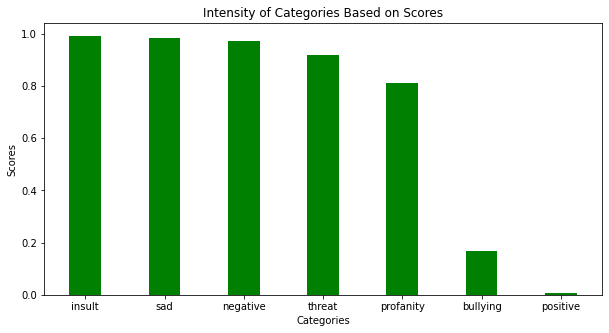

In [15]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(output['labels'], output['scores'], color ='green',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Scores")
plt.title("Intensity of Categories Based on Scores")
plt.show()